## __Two Sample Independent T-Test__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import random
import pingouin as pg

## __T-Test Unpaired__

In [3]:
study = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'], name='Study'),
                  pd.Series(data=[70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name='Score')], axis=1)
study

,Study,Score
0,Yes,70
1,No,85
2,Yes,80
3,Yes,45
4,No,80
5,No,70
6,No,90
7,Yes,70
8,Yes,55
9,No,80


In [27]:
study['Study'].value_counts()

Yes    10
No     10
Name: Study, dtype: int64

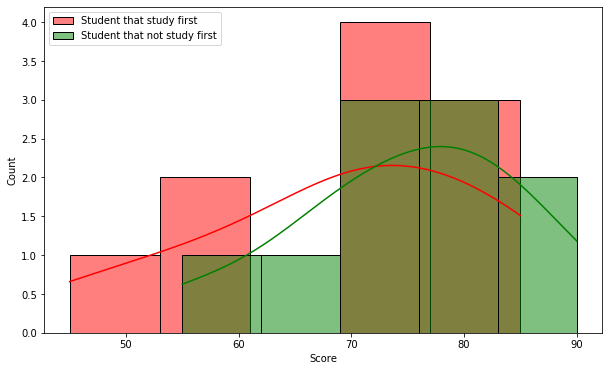

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(study[study['Study'] == 'Yes']['Score'], color='red', label='Student that study first', kde=True)
sns.histplot(study[study['Study'] == 'No']['Score'], color='green', label='Student that not study first', kde=True)
plt.legend()
plt.show()

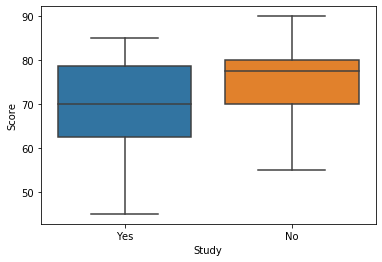

In [9]:
sns.boxplot(x = 'Study', y='Score', data=study)
plt.show()

## __T-Test Unpaired (One Tail)__

Ho : Mean Population of Score not study = Mean Population of Score study 
<br>
Ha : Mean Population of Score not study > Mean Population of Score study

## __T-Test Unpaired: Not Equal Variance__

In [11]:
alpha = 0.05 # two tails

result = list(stats.stats.ttest_ind(study[study['Study'] == 'Yes']['Score'],
                             study[study['Study'] == 'No']['Score'],
                             equal_var=False))
print(result)

[-1.0493389512356741, 0.308640655834749]


In [ ]:
print('T Statistics:', result[0])
print('P-value:', result[1])

## __T-Test Unpaired: Equal Variance__

In [28]:
result_eq = list(stats.stats.ttest_ind(study[study['Study'] == 'Yes']['Score'],
                             study[study['Study'] == 'No']['Score'],
                             equal_var=True))

print('T Statistics:', result_eq[0])
print('P-value:', result_eq[1])

T Statistics: -1.049338951235674
P-value: 0.30790774567150303


The P-value is higher than our significant level 0.025 (One tail), it means we don't have enough evidence to reject the Null Hypothesis. So, Mean Population of Score not study are still aproximately equal to Mean Population of Score study.

## __T-Test Unpaired Two Tails__

Ho : Mean Population of Score not study = Mean Population of Score study 
<br>
Ha : Mean Population of Score not study != Mean Population of Score study

non equal variance assumption

In [17]:
alpha = 0.05 # two tails

result_2 = list(stats.stats.ttest_ind(study[study['Study'] == 'Yes']['Score'],
                             study[study['Study'] == 'No']['Score'],
                             equal_var=False))

print('T Statistics:', result_2[0])
print('P-value:', result_2[1])

T Statistics: -1.0493389512356741
P-value: 0.308640655834749


The P-value is higher than our significant level 0.05 (Two tails), it means we don't have enough evidence to reject the Null Hypothesis. So, Mean Population of Score not study are still aproximately equal to Mean Population of Score study.

## __T-Test Paired__

reaction time on driving skill before and while using cell phone

In [18]:
with_cell_phone = [604,556,540,522,469,544,513,470,556,531,599,537,619,536,554,467]
without_cell_phone = [636,623,615,672,601,600,542,554,543,520,609,559,595,565,573,554]

df_paired = pd.DataFrame({
    'no':without_cell_phone,
    'yes':with_cell_phone
})
df_paired

,no,yes
0,636,604
1,623,556
2,615,540
3,672,522
4,601,469
5,600,544
6,542,513
7,554,470
8,543,556
9,520,531


In [19]:
df_paired['diff'] = df_paired['yes'] - df_paired['no']

In [20]:
df_paired

,no,yes,diff
0,636,604,-32
1,623,556,-67
2,615,540,-75
3,672,522,-150
4,601,469,-132
5,600,544,-56
6,542,513,-29
7,554,470,-84
8,543,556,13
9,520,531,11


In [21]:
df_paired['diff'].describe()

count     16.000000
mean     -46.500000
std       50.146452
min     -150.000000
25%      -77.250000
50%      -30.500000
75%      -16.750000
max       24.000000
Name: diff, dtype: float64

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


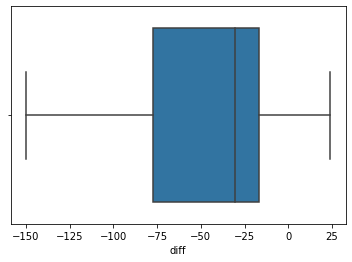

In [22]:
sns.boxplot(df_paired['diff'])

Ho : Mean Population of difference (yes-no) = 0
<br>
Ha : Mean Population of difference (yes-no) < 0

In [26]:
alpha = 0.05/2
tstat, pval = stats.stats.ttest_1samp(df_paired['diff'], 0)
print('T-statistic:', tstat)
print('P-value:', pval/2)
print('alpha:', alpha)
print('T-crit:', -2.131)

T-statistic: -3.7091357792693707
P-value: 0.0010497189034628326
alpha: 0.025
T-crit: -2.131


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, reaction time on driving skill after using cell phone are lower than before using cell phone 